# Three-fluid modeling of a sheath in an isothermal weakly-ionized collisionless plasma

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="This documment is written in a Jupyter notebook and the code used to produce these analyses has been hidden for ease of reading.  
To make the code visible click here"></form>''')

We present the solutions of a weakly-ionized collisionless plasma between two floating plates. The set of equations that are solved are as follow

$$\partial_t n_e + \partial_x \left( n_e u_e \right) = n_e \nu_{iz} $$
$$\partial_t \left(n_eu_e\right) + \partial_x \left( n_e (u_e^2 + \epsilon^{-1})\right) = \frac{n_e}{\epsilon}\partial_x\phi - \nu_e n_e u_e $$

$$\partial_t n_+ + \partial_x \left( n_+ u_+ \right) = n_e \nu_{iz} $$
$$\partial_t \left(n_+u_+\right) + \partial_x \left( n_+ (u_+^2 + \kappa)\right) = -n_+\partial_x\phi - \nu_+ n_+ u_+ $$

$$\partial_t n_- + \partial_x \left( n_- u_- \right) = 0 $$
$$\partial_t \left(n_-u_-\right) + \partial_x \left( n_- (u_-^2 + \beta)\right) = n_-\partial_x\phi - \nu_- n_- u_- $$

$$\lambda^2\partial^2_{xx}\phi = n_e + n_m - n_i $$

The simulation allows for choosing for the following degrees of freedom

 - $\epsilon$
 - $\kappa$
 - $\nu_e$
 - $\nu_i$
 - $\lambda_D/L$

The ionization is not a proper degree of freedom as it is an eigenvalue of the system to find a steady solution. We compute the ionization as a function of the ion wall flux every time step, as follows

$$\text{Da} = \frac{2\left|\Gamma_{i_w}\right|}{<n_e>L}$$

where the average density is computed as $$<n_e>L = \int_0^L n_e dx$$

## Case Study 1

We study the following conditions:

$$\epsilon^{-1} = 73451.7$$
$$T_i/T_e = 0.025$$
$$T_m/T_e = 0.05$$
$$\nu_e = 0$$
$$\nu_i = 0$$
$$\nu_m = 0$$
$$n_m/n_e(t=0) = 0.1/0.9$$
$$L/\lambda_D = 500$$

- Limiter   : First Order
- Time      : Forward Euler
- CFL       : 0.9
- Nb Points : 2500

See next cell for input parameters


Press Shift+enter to read results

In [1]:
import sys  
import os
import numpy as np
# IMPORT PATH TO PYTHONTOOLS MODULE
sys.path.append('../PythonTools') 

import plotResults
import tkinter as tk

from tkinter import filedialog

%gui tk

root = tk.Tk()
root.withdraw()

''

In [2]:
currentPath = os.getcwd()
filename = filedialog.askopenfilename(parent=root, initialdir=currentPath)
root.destroy()
print('Reading %s' % filename)

results = []
with open(filename, 'r') as data:
    j = 0                   # counter of the lines of the file
    for line in data:
        p = line.split()
        results.append(np.array(p))


# Transpose and change data type
results = np.array(results)
resultsTP = np.transpose(results)

resultsTP   = resultsTP.astype(np.float)        

plotData = plotResults.Data(resultsTP)
# Initializing without the results to choose it directly by hand
#plotData2 = plotResults.Data()

print("NbEqs = ", plotData.nbEqs)
print("NbCells = ",plotData.nbCells)



Reading /Users/alaguna/Documents/16_PostDoc/16_C++Code/5_Muffin/testcases/Results_ThreeFluid/file_iter_002000_time_0.0503.txt
NbEqs =  7
NbCells =  500


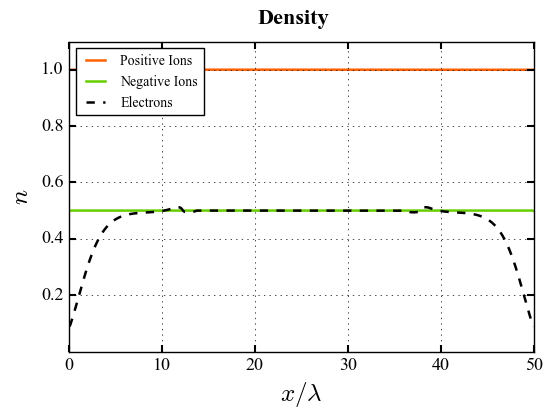

alpha =  0.999960683544
0.0884939817
0.0884958912


In [3]:
import matplotlib
import matplotlib.pyplot as plt         ## plots


plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
n_e = plotData.resultsArray[1]
n_i = plotData.resultsArray[3]
n_m = plotData.resultsArray[5]

#print(n_m)
#print(n_e)
#print(n_i)

ax.plot(x, n_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Positive Ions')
ax.plot(x, n_m, color=(102/255,205/255,0), linewidth=1.8, markersize=3, label ='Negative Ions')
ax.plot(x, n_e, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=
18, weight = 'bold')
ax.set_ylabel(r'$n$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'upper left', fontsize = 10)

f.suptitle('Density', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(n_m)
ymax = max(n_i)
ax.set_ylim([1e-35,1.1*ymax])
#ax.set_ylim([0,1e-4])
#ax.set_xlim([0,5])
#ax.set_yscale("log", nonposy='clip')
ax.grid(True)
plt.show()

print("alpha = ", (n_m[249] + n_m[250])/(n_e[249] + n_e[250]))
print(n_e[0])
print(n_e[499])


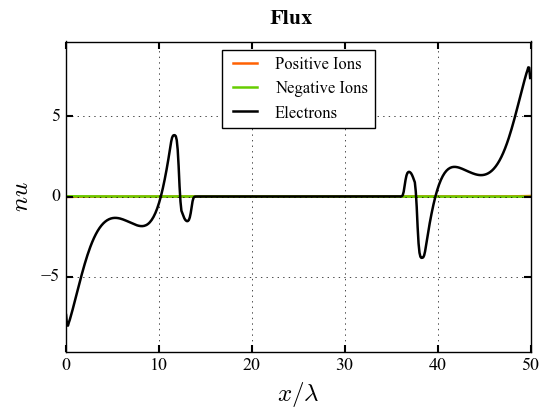

In [4]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
nU_e = plotData.resultsArray[2]
nU_i = plotData.resultsArray[4]
nU_m = plotData.resultsArray[6]


ax.plot(x, nU_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Positive Ions')
ax.plot(x, nU_m, color=(102/255,205/255,0), linewidth=1.8, markersize=3, label ='Negative Ions')
ax.plot(x, nU_e, linestyle='-', color='k', linewidth=1.8, markersize=3, label ='Electrons')
#ax.plot(x, nU_i - nU_m - nU_e, linestyle='-', color='r', linewidth=1.8, markersize=3, label ='Total')

ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$nu$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'upper center', fontsize = 12)

f.suptitle('Flux', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(nU_e)
ymax = max(nU_e)
ax.set_ylim([1.2*ymin,1.2*ymax])
#ax.set_xlim([-5,5])
ax.grid(True)
plt.show()
#print(nU_e/max(n_e))
#print(n_e[0]*np.sqrt(64625.346)/np.sqrt(2*np.pi))


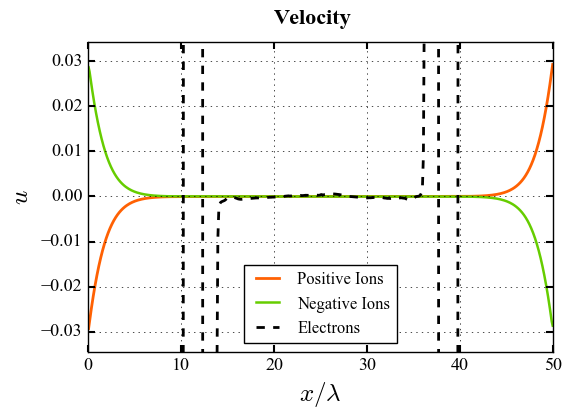

In [5]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
U_e = nU_e[:]/n_e[:]
U_i = nU_i[:]/n_i[:]
U_m = nU_m[:]/n_m[:]
#print(U_m)

ax.plot(x, U_i, color=(255/255,97/255,3/255), linewidth=2, markersize=3, label ='Positive Ions')
ax.plot(x, U_m, color=(102/255,205/255,0), linewidth=1.8, markersize=3, label ='Negative Ions')
ax.plot(x, U_e, linestyle='--', color='k', linewidth=2, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$u$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Velocity', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(U_m)
ymax = max(U_m)
ax.set_ylim([1.2*ymin,1.2*ymax])
#ax.set_xlim([1990,2000])
ax.grid(True)
plt.show()

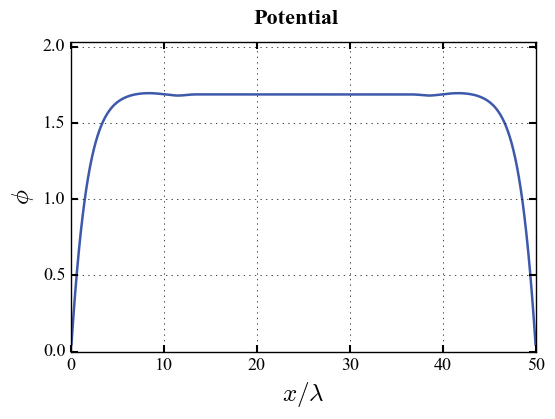

In [6]:
plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
phi = plotData.resultsArray[7]

#MASSRATIO = 73451.7;
MASSRATIO = 64625.346
phi_W    = np.log((MASSRATIO/(2*np.pi))**(1/2))*np.ones(x.size);
phi_P    = (phi_W + 0.5)*np.ones(x.size);

ax.plot(x, phi_W, color=(0, 0.4, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi_P, color=(0, 0.6, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi, color=(61/255,89/255,171/255), linewidth=1.8, markersize=3, label ='Potential')

ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$\phi$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
#plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Potential', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

#plt.text(0.9*max(x),1.04*max(phi_W),r'$\phi_W$',fontsize=13,color=(0, 0.4, 0), weight = 'bold')
#plt.text(0.9*max(x),1.04*max(phi_P),r'$\phi_p$',fontsize=13,color=(0, 0.6, 0), weight = 'bold')


ymin = min(phi)
ymax = max(phi)
ax.set_ylim([0,1.2*ymax])
#ax.set_xlim([0,1])
ax.grid(True)
plt.show()




We compute the ionization rate that is computed as

$$ \nu_{iz} = \frac{2\Gamma_i}{\int_0^l n_e dx}$$

We assume the electron temperature to be $T_e = 3eV$. In Chlorine, the ionization rate constant reads

$$K_{iz} = 9.2 × 10^{-14} × \exp(−12.9/T_e)$$

We can obtain the gas density as 

$$n_g = \nu_{iz}/K_{iz}$$

We compute the attachment frequency as

$$ \nu_{att} = n_g × 3.69 × 10^{−16} × \exp(−1.68/T + 1.457/T^2 − 0.44/T^3 + 0.0572/T^4 − 0.0026/T^5)$$

In [9]:
integral = 0

Dx = x[1] - x[0]
NbCells = plotData.nbCells

#first cell
integral = n_e[0]*Dx/2

for i in range(1, NbCells - 1):
    integral = integral + (n_e[i + 1] + n_e[i])/2*Dx
    
integral = integral + n_e[NbCells - 1]*Dx/2
print("<n_e>l = ",integral)

Flux_ion = nU_i[0]

frequency = 2*abs(Flux_ion)/integral
print("nu_iz = ", frequency)

T_e = 3
n_g = frequency/9.2e-14*np.exp(-12.9/T_e)

freq_att = n_g*3.69e-16*np.exp(-1.68/T_e + 1.457/T_e**2 - 0.44/T_e**3 + 0.0572/T_e**4 - 0.0026/T_e**5)
print("n_g = ",n_g)
print("nu_att = ",freq_att)

<n_e>l =  11.9383932255
nu_iz =  0.0974516401014
n_g =  14372590538.6
nu_att =  3.50661922245e-06


## Case Study 1

We study the following conditions:

$$\epsilon^{-1} = 73451.7$$
$$T_i/T_e = 0.025$$
$$T_m/T_e = 0.05$$
$$\nu_e = 0$$
$$\nu_i = 0$$
$$\nu_m = 0$$
$$n_m/n_e(t=0) = 0.1/0.9$$
$$L/\lambda_D = 500$$

- Limiter   : First Order
- Time      : Forward Euler
- CFL       : 0.9
- Nb Points : 2500

See next cell for input parameters


Press Shift+enter to read results

In [1]:
import sys  
import os
import numpy as np
# IMPORT PATH TO PYTHONTOOLS MODULE
sys.path.append('../PythonTools') 

import plotResults
import tkinter as tk
from tkinter import filedialog

%gui tk

root = tk.Tk()
root.withdraw()

currentPath = os.getcwd()
filename = filedialog.askopenfilename(parent=root, initialdir=currentPath)
root.destroy()
print('Reading %s' % filename)

results = []
with open(filename, 'r') as data:
    j = 0                   # counter of the lines of the file
    for line in data:
        p = line.split()
        results.append(np.array(p))

# Transpose and change data type
results = np.array(results)
resultsTP = np.transpose(results)

resultsTP   = resultsTP.astype(np.float)        

plotData = plotResults.Data(resultsTP)
# Initializing without the results to choose it directly by hand
#plotData2 = plotResults.Data()

print("NbEqs = ", plotData.nbEqs)
print("NbCells = ",plotData.nbCells)



Reading /Users/alaguna/Documents/16_PostDoc/16_C++Code/5_Muffin/testcases/Results_ThreeFluid/file_iter_001000_time_0.0233.txt
NbEqs =  6
NbCells =  500


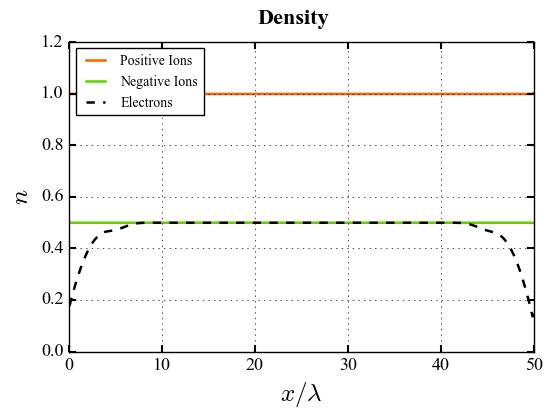

In [2]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
n_e = plotData.resultsArray[1]
n_i = plotData.resultsArray[3]
n_m = plotData.resultsArray[5]

ax.plot(x, n_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Positive Ions')
ax.plot(x, n_m, color=(102/255,205/255,0), linewidth=1.8, markersize=3, label ='Negative Ions')
ax.plot(x, n_e, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=
18, weight = 'bold')
ax.set_ylabel(r'$n$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'upper left', fontsize = 10)

f.suptitle('Density', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(n_e)
ymax = max(n_i)
ax.set_ylim([0,1.2*ymax])
ax.grid(True)
plt.show()


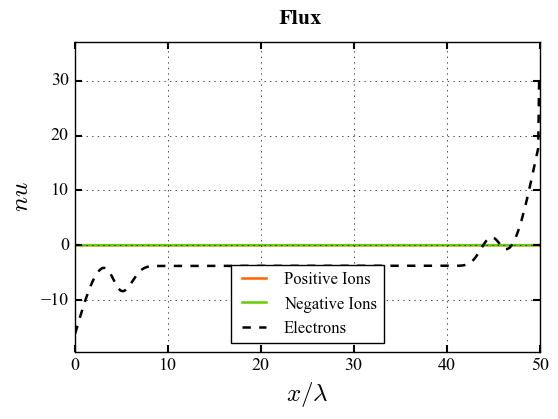

[-16.1644604  -15.57874    -15.0117786  -14.4416537  -13.871324   -13.3033332
 -12.7399798  -12.1833399  -11.6352853  -11.0974987  -10.571489   -10.0586077
  -9.56006586  -9.07695321  -8.61025805  -8.1608888   -7.72969665
  -7.31749932  -6.92510575  -6.55334213  -6.20307923  -5.87525979
  -5.57092691  -5.29125227  -5.0375622   -4.8113602   -4.61434212
  -4.4483994   -4.31560388  -4.21816621  -4.15835783  -4.13838864
  -4.16031005  -4.22582965  -4.33594874  -4.490659    -4.68871085
  -4.92737034  -5.20225457  -5.50728893  -5.83481603  -6.17586899
  -6.52059469  -6.85878436  -7.18045134  -7.476386    -7.73862283
  -7.96077386  -8.13820794  -8.26808073  -8.34924008  -8.38205271
  -8.36817885  -8.31029466  -8.21184945  -8.07687213  -7.90979347
  -7.71529885  -7.49820799  -7.263376    -7.01560895  -6.7595883
  -6.4998014   -6.24047408  -5.98550524  -5.73840493  -5.50223759
  -5.27957378  -5.07245413  -4.88236893  -4.71025597  -4.55651808
  -4.42106016  -4.30334427  -4.20245925  -4.1172005  

0.431336

In [3]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
nU_e = plotData.resultsArray[2]
nU_i = plotData.resultsArray[4]
nU_m = plotData.resultsArray[6]


ax.plot(x, nU_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Positive Ions')
ax.plot(x, nU_m, color=(102/255,205/255,0), linewidth=1.8, markersize=3, label ='Negative Ions')
ax.plot(x, nU_e, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$nu$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Flux', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(nU_e)
ymax = max(nU_e)
ax.set_ylim([1.2*ymin,1.2*ymax])
ax.grid(True)
plt.show()

print(nU_e)

-4.31353000e-01
4.31336000e-01

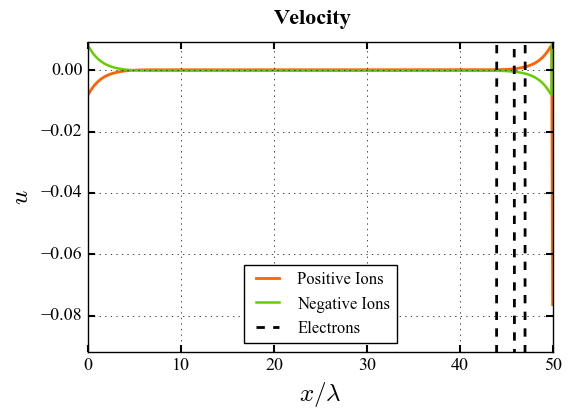

In [4]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
U_e = nU_e[:]/n_e[:]
U_i = nU_i[:]/n_i[:]
U_m = nU_m[:]/n_m[:]

ax.plot(x, U_i, color=(255/255,97/255,3/255), linewidth=2, markersize=3, label ='Positive Ions')
ax.plot(x, U_m, color=(102/255,205/255,0), linewidth=1.8, markersize=3, label ='Negative Ions')
ax.plot(x, U_e, linestyle='--', color='k', linewidth=2, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$u$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Velocity', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(U_i)
ymax = max(U_i)
ax.set_ylim([1.2*ymin,1.2*ymax])
ax.grid(True)
plt.show()

In [5]:
plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
phi = plotData.resultsArray[7]

MASSRATIO = 73451.7;
phi_W    = np.log((MASSRATIO/(2*np.pi))**(1/2))*np.ones(x.size);
phi_P    = (phi_W + 0.5)*np.ones(x.size);

ax.plot(x, phi_W, color=(0, 0.4, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi_P, color=(0, 0.6, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi, color=(61/255,89/255,171/255), linewidth=1.8, markersize=3, label ='Potential')

ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$\phi$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
#plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Potential', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

plt.text(0.9*max(x),1.04*max(phi_W),r'$\phi_W$',fontsize=13,color=(0, 0.4, 0), weight = 'bold')
plt.text(0.9*max(x),1.04*max(phi_P),r'$\phi_p$',fontsize=13,color=(0, 0.6, 0), weight = 'bold')

ymin = min(phi)
ymax = max(phi)
ax.set_ylim([ymin,1.2*ymax])
ax.grid(True)
plt.show()




IndexError: index 7 is out of bounds for axis 0 with size 7